# progHW 1: Linear Transformations 

As you have seen in class, matrices are useful tools if we want to apply linear transformations such as translations, rotations, etc. The goal of this assignment is to use matrices (or equivalently, numpy arrays) to tranform figures built from vectors. 


## Drawing figures in 2D

The first figure that we will draw in 2D, is a very simple dinosaur. It is a little bit what you were doing as a child when playing the connect-the-dots puzzles.

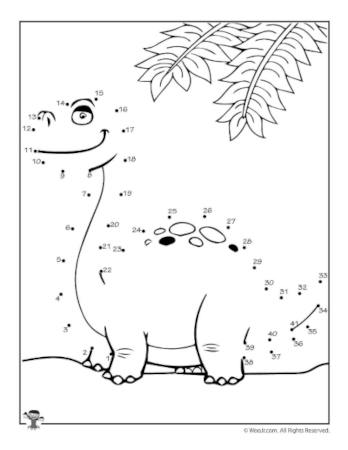

With this simple figure, it will be very easy for you to test if your transformations are working properly and to fix possible errors. Once you'll be able to apply linear transformations to the dinosaur, we'll move to  a more complex example.

In the cell below, we define `dino_vectors` which is a list of the coordinates of the different "dots" of the dinosaur. More precisely, if $v_0 = (x_0, y_0), \dots, v_{n-1} = (x_{n-1}, y_{n-1})$ are the pairs of `dino_vectors`, then the dinosaur can be drawn by connecting $v_i$ to $v_{i+1}$ and $v_{n-1}$ to $v_0$. 

We also define `dino_matrix` which is a numpy array of size $n \times 2$. Each row of this numpy array contains the coordinates of $v_i$. As we saw in the introductory notebook, using numpy arrays instead of lists, allows us to easily perform all kinds of matrix operations.

### Important:
    * DO NOT import any packages unless explicitly asked.
    * ONLY work where "#. Your solution here..." is written. Nowhere else.
    * Do NOT change any function names, arguments, etc.
    * Please follow the hint instructions. If is stated to not return anything, please strictly do not. Else the AutoTest will break.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#dinosaur

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), 
   (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3), 
   (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

dino_matrix = np.array(dino_vectors)
print(dino_matrix)

[[ 6  4]
 [ 3  1]
 [ 1  2]
 [-1  5]
 [-2  5]
 [-3  4]
 [-4  4]
 [-5  3]
 [-5  2]
 [-2  2]
 [-5  1]
 [-4  0]
 [-2  1]
 [-1  0]
 [ 0 -3]
 [-1 -4]
 [ 1 -4]
 [ 2 -3]
 [ 1 -2]
 [ 3 -1]
 [ 5  1]]


###  Exercise 1 (0.25 pt): Plotting one vector of the dinosaur

Before we can fully plot the dinosaur (or any other figure built from vectors), we ask you to define an intermediate function `plot_line(p1, p2)`, plotting a line connecting the point `p1` with the point `p2`. Note that the points `p1` and `p2` are pairs of coordinates. 

Hint. Have a look at the section "Plotting a line" from the introductory notebook. Make also sure to specify the color of the vectors (otherwise when you'll plot the dinosaur, each vector will end up in a different color).

We added a small test where your function is used to draw the first vector of the dinosaur. If your implementation is correct,you should see something like this:

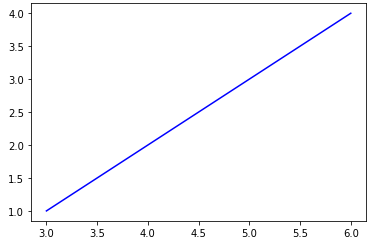

#### Important: 
As you can see, the command `plt.show()` is already written outside of the function `plot_line`. So you don't need to call `plt.show()` inside the function `plot_line` and in fact, this would cause problems when we will want to draw many vectors within the same figure. 

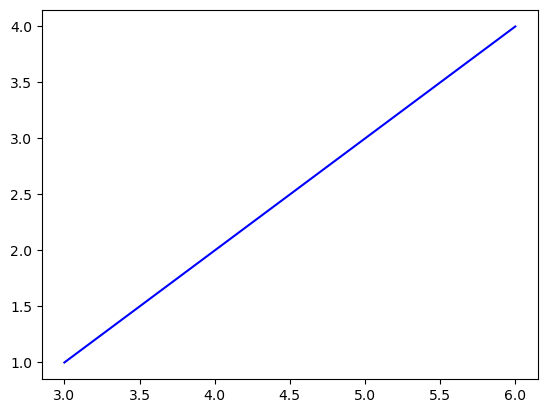

In [2]:
# Hint: Only plot, do NOT return anything.
def plot_line(p1, p2):
    xvalues = [p1[0], p2[0]]
    yvalues = [p1[1], p2[1]]
    plt.plot(xvalues, yvalues, 'blue')

plot_line(dino_matrix[0], dino_matrix[1])
plt.show()

### Exercise 2 (0.5 pt): Plotting the dinosaur

Now that we can draw a vector, we are ready to draw the dinosaur, which is nothing else but a collection of vectors. We ask you to implement the function `plot_path(list_vec)`, where `list_vec` is a list of vectors $v_0, \dots, v_{n-1}$ (and each vector is a pair of coordinates). Using the function `plot_line`, you should iteratively draw a line from the vector $v_i$ to the vector $v_{i+1}$ (for $i \leq n-2$). Do not forget at the end to also draw a line from the vector $v_{n-1}$ to the vector $v_0$. 

If your implementation of `plot_path` is correct, the dinosaur should appear when you run the cell below.

(21, 2)


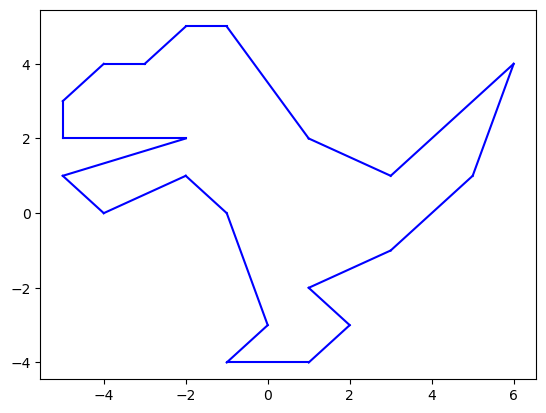

In [3]:
# Hint: Only plot, do NOT return anything.
def plot_path(list_pts):
    for i in range(len(list_pts)):
        p1 = list_pts[i]
        p2 = list_pts[(i + 1) % len(list_pts)]
        plot_line(p1, p2)

plot_path(dino_matrix)
print(np.shape(dino_matrix))
plt.show()

## Drawing a more complex figure

Now the idea is to also apply transformations to more complex figures that you would not be able to draw by hand. Instead of a dinosaur with $21$ points, we will draw a STL figure using more than $4000$ points. STL figures are basically made from a collection of triangles and are very common for 3D printing. In the examples below, you can see that by using more triangles, we can achieve a higher degree of details.

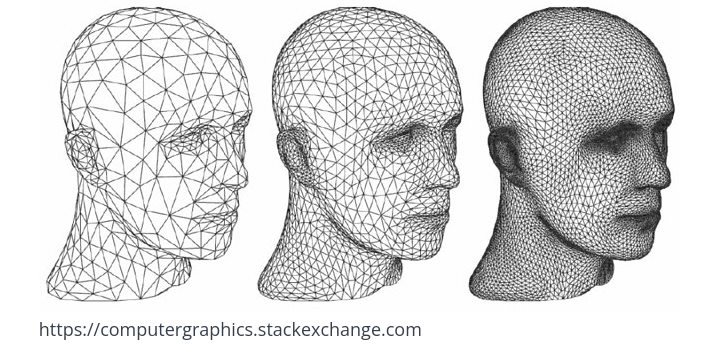

In the picture below, you can find a much simpler example of an STL figure representing a square and using two triangles.  

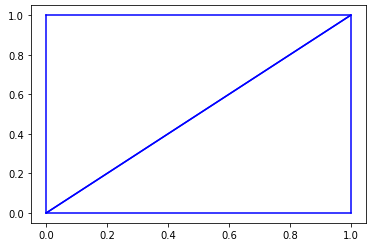

A single triangle in an STL figure, can be described by a matrix (or numpy array) where each row contains the coordinates of one vertex. It is the same principle as for the dinosaur, except that here we only need three dots. For example, in the first figure above, one triangle is described by the array `np.array([[0,0],[0,1] ,[1,1]])`, while the other triangle is described by the array `np.array([[0,0],[1,0],[1,1]])`. In its essence, an STL file can be considered as a collection (or  a list) of triangle descriptions. For example, the first STL figure would be described by the list `[np.array([[0,0],[0,1],[1,1]]), np.array([[0,0],[1,0],[1,1]])]`. Note that in general, STL figures are in 3D (and not in 2D) and the description of a triangle would also include the coordinates of the normal vector to the triangle (here, since we are in 2D, we left out the description of the normal vector).

Using very large collection of triangles, we can draw rather complex figures. The STL figure that we will draw here, is described by the file `file_box.stl` and looks like two interlocked boxes:

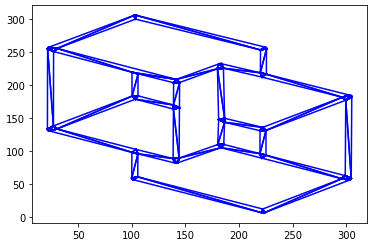

The cell below contains a bit of code extracting the list of triangle descriptions from the STL file. More precisely, the list `box_2d` is a list of numpy arrays of size $3 \times 2$ and each numpy array contains the 2D coordinates of the vertices of a triangle.

In [4]:
def read_stl(filename):
    flag = False
    matrix_list = []
    temp_matrix = []

    for line in open(filename,'r').readlines():

        if "outer loop" in line:
            flag = True

        elif "endloop" in line:
            matrix_list.append(np.array(temp_matrix))

            temp_matrix = []
            flag = False

        elif flag:
            s = line.split()
            
            temp_matrix.append([float(x) for x in s[1:]])
            
    return matrix_list


box_stl = read_stl('file_box.stl')
box_2d = [tri[:, :2] for tri in box_stl if np.all(tri[:, 2] == 0)]

# You can uncomment this line below for testing purposes.
# display(box_2d)

### Exercise 3 (0.25 pt): Plotting the STL boxes

We will now plot the STL figure described by the list `box_2d`. We ask you to write a function `plot_stl(list_triangles)` which given a list `list_triangles` of triangle descriptions, plot each triangle from the list. Recall that each triangle description is a numpy array where each row contains the coordinates of one vertex. Therefore, to plot a single triangle, you can reuse the function `plot_path` that you previously wrote.

If your implementation is correct, you should now see the plot of the two interlocked boxes.

#### Note:
If you are not able to complete Exercise 3 (or if you simply want to do it later), you can still continue the assignment, as all the other exercises can be done without Exercise 3.

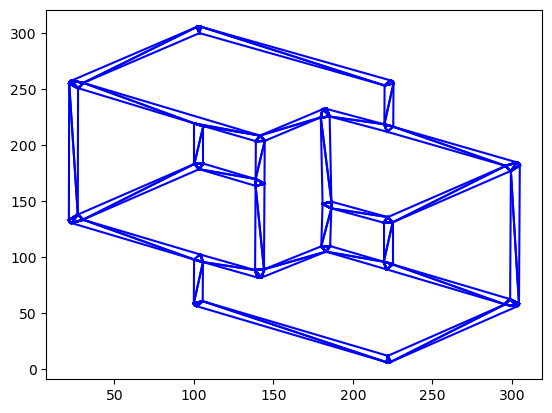

In [5]:
# Hint: Only plot, do NOT return anything.
def plot_stl(list_triangles):
    for i in range(len(list_triangles)):
        triangle = list_triangles[i]
        for j in range(len(triangle)):
            p1 = triangle[j]
            p2 = triangle[(j + 1) % len(triangle)]
            plot_line(p1, p2)

plot_stl(box_2d)    
plt.show()

## Translating

### Exercise 4 (0.25 pt): Translating a vector

We will now implement the first transformation and start translating our figures. Recall that if $\vec{t} = [v_1,v_2]^T$ is a translation vector, then the result of the translation of a vector $\vec{v} = [t_1,t_2]^T$ is simply the vector
$$
\vec{t} +\vec{v} = [v_1+t_1,v_2+t_2]^T
$$

Before translating the figures, we will write a simpler function translating a single vector. We ask you to write a function `translate_vec(vec, translation_vec)` that returns the translation of `vec`, when using `translation_vec` as translation vector.

Note that the translated vector should be the return of your function, but your function should not modify the values of `vec` and `translation_vec`.

In [6]:
# Hint: Return the translated vector.
def translate_vec(vec, translation_vec):
    return vec + translation_vec

You can run the cell below to test your code.

In [7]:
v1 = np.array([1,2])
v2 = np.array([5,7])
assert all(translate_vec(v1,v2) == np.array([6,9])), 'Basic test failed'
assert all(translate_vec(v2,v1) == np.array([6,9])), 'Basic test failed'
assert all(v1 == np.array([1,2])), 'Basic test failed'
assert all(v2 == np.array([5,7])), 'Basic test failed'
assert np.array_equal(translate_vec(np.array([1,2,3]), np.array([5,7,2])), np.array([6,9,5])), '>2D test failed'

print('Function seems to work')

Function seems to work


Now, in our case, the problem is that we are not translating only one vector, but we need to translate a list of $n$ vectors (or equivalently, a numpy array of size $n \times 2$). But actually, we won't have to do any extra work to extend our translating function `translate_vec`, thanks to a very nice feature of numpy called broadcasting. 

You can read a little bit about broadcasting [here](https://numpy.org/doc/stable/user/absolute_beginners.html#broadcasting). The page also contains a link to a more extensive description from the official numpy documentation.

A simple example of broadcasting is when, let's say, you have a numpy array `a1 = np.array([[1,2],[3,4]])` and you would like for example to add $2$ to each value of the array. Mathematically, if we think of the numpy array as matrix, what we should do is define a new numpy array `a2 = np.array([[2,2],[2,2]])` and add `a1` and `a2`. However, in numpy, if we simply write `a1 + 2`, we would get the same result. What happens is that numpy "understands" that  `a1` and the scalar `2` do not have matching dimensions and so perfoms the addition in each cell of `a1`. Broadcasting is this ability to perfom "in a natural way" operations between numpy arrays of non-matching dimensions.

Again, if you want a more formal description, you can check the link above but for our purpose, it is enough if you understand intuitively broadcasting. Let us go back to our problem of translating figures, You already wrote the function `translate_vec(vec, translate_vec)`, which can translate a single vector `vec`. But thanks to the broadcasting feature, if we replace `vec` by a numpy array which is a list of $n$ vectors, the function `translate_vec` will now return a list of the translated vectors.

If you run the cell below (and your implementation of `translate_vec` is correct), you should be able to see the the original dinosaur together with the translated dinosaur.

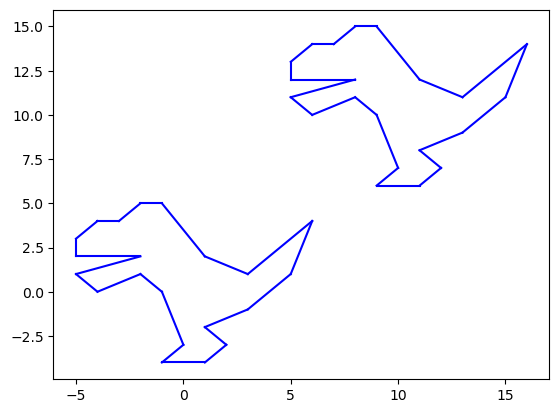

In [8]:
plot_path(dino_matrix)
plot_path(translate_vec(dino_matrix, np.array([[10,10]])))
plt.show()

Once we know how to plot a translated dinosaur, then the same function `translate_vec` should also work to translate the STL boxes.

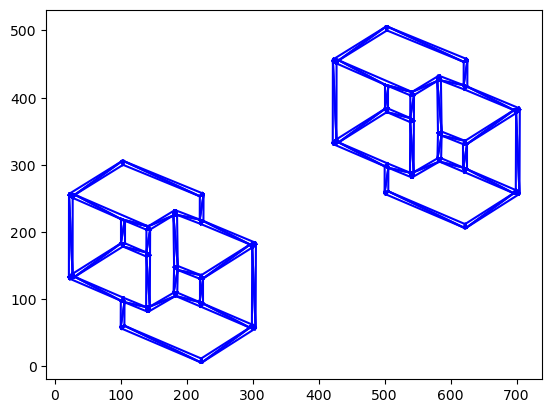

In [9]:
plot_stl(box_2d)

for triangle in box_2d:
        plot_path(translate_vec(triangle, np.array([[400,200]])))

plt.show()

## Scaling figures

### Exercise 5 (0.25pt): Scaling a figure

Our next transformation consists in changing the scale of the figures. We ask you to write the function `resizing(array, s)`, which returns a numpy array obtained by multiplying by `s` each value of `array`. Remember that you can make use of the broadcasting property.

If your implementation is correct, then, you should see the original dinosaur together with another dinosaur, which is $1/3$ of the original scale.

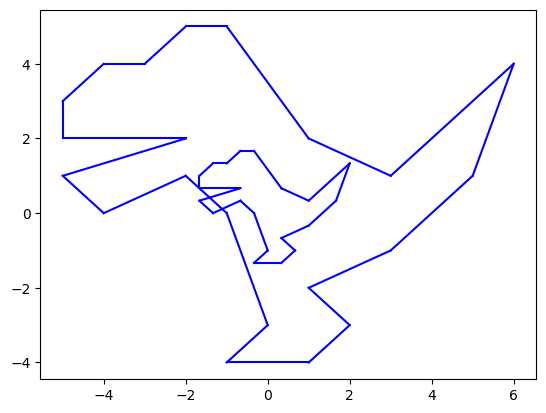

In [10]:
# Hint: Return the resized array.
def resizing(array, s):
    return (array * (s))

plot_path(dino_matrix)
plot_path(resizing(dino_matrix, 1/3))
plt.show()

As with translations, we can use the same function to resize the STL boxes.

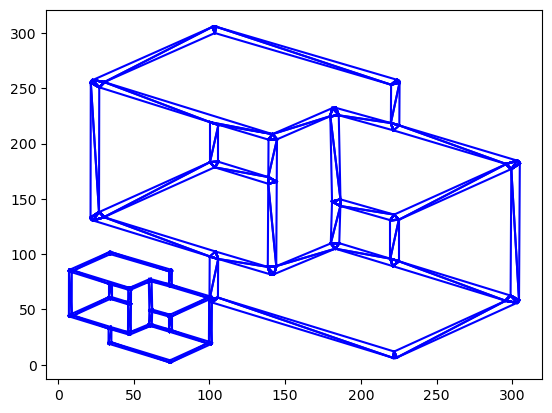

In [11]:
plot_stl(box_2d)

for triangle in box_2d:
        plot_path(resizing(triangle, 1/3))

plt.show()

## Rotating figures

The next transformations we will implement, are rotations. 

### Exercise 6 (0.5 pt): Computing a rotation matrix

In order to apply rotations, you should first write a function `rotation_matrix(theta)` which, given an angle `theta` (expressed in radians), returns the rotation matrix associated with `theta`. 

The [math module](https://docs.python.org/3/library/math.html) provides built-in functions for computing the cosinus and the sinus of an angle. You can read the documentation about the trigonometric function [here](https://docs.python.org/3/library/math.html#trigonometric-functions).

In [19]:
# Hint: Return the rotated array.
def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

You can run the cell below to test your code.

In [20]:
assert np.allclose(rotation_matrix(math.pi/2),np.array([[0,-1],[1,0]])), 'Basic test failed'
assert np.allclose(rotation_matrix(1),np.array([[ 0.54030231, -0.84147098],[ 0.84147098,  0.54030231]])), 'Basic test failed'
assert np.allclose(rotation_matrix(0),np.array([[1,0],[0,1]])), 'Basic test failed'

print('Function seems to work')

Function seems to work


###  Rotating a figure

Remember from your linear algebra course that if $R$ is the matrix associated with a rotation of angle $\theta$, then $R \begin{bmatrix}{x \\ y} \end{bmatrix} $ is the vector obtained after rotating $\begin{bmatrix}{x \\ y} \end{bmatrix} $ with an angle $\theta$.

If, like in our case, we want to apply this transformation to a set of vectors $v_0, \dots, v_{n-1}$, then as you saw during the hoorcollege, you can directly compute the product 
$$
RV$$, 
where $V = \begin{bmatrix}x_0 & \dots & x_{n-1}  \\ y_0 & \dots & y_{n-1} \end{bmatrix}$ and $v_i = \begin{bmatrix}x_i \\ y_i \end{bmatrix}$. Then the $i$-th column of $RV$ corresponds to the vector obtained after rotating $v_{i-1}$.

Now it is important to note that in our case, `dino_matrix` (which is of shape $n \times 2$ and each *row* corresponds to a vector) is not the same as the matrix $V$ (which is of shape $2 \times n$ and each *column* corresponds to a vector). In fact, `dino_matrix` is the transpose of the matrix $V$. So if we want to rotate the dinosaur, we should transpose `dino_matrix` before applying a left multiplication by $R$. 

Recall that in Numpy, `A@B` is the matrix product of `A` and `B`, and `A.T` is the transpose of `A`. So the result `R @ dino_matrix.T` is now a matrix of dimension $2 \times n$, where each column contains a vector of the rotated dinosaur.

Next we would like to use our function `plot_path` to plot the rotated dinosaur. It is important to realize that the input for `plot_path` should be a matrix of size $n \times 2$, where each row corresponds to a vector (as this was the original format of the data). Since `R @ dino_matrix.T` is a matrix where each column corresponds to a vector, we should use the transpose of the matrix `R @ dino_matrix.T` as the input for the function `plot_path`.

In the cell below, we define a function `apply_transformation` taking care of transposing `dino_matrix` before left multiplying it by $R$ and transposing the final result again, back to the original format.

If your implentation of `rotation_matrix` is correct, you should see the dinosaur rotated with an angle of $180$ degrees when running the cell below. You can play and modify the angle of rotation.

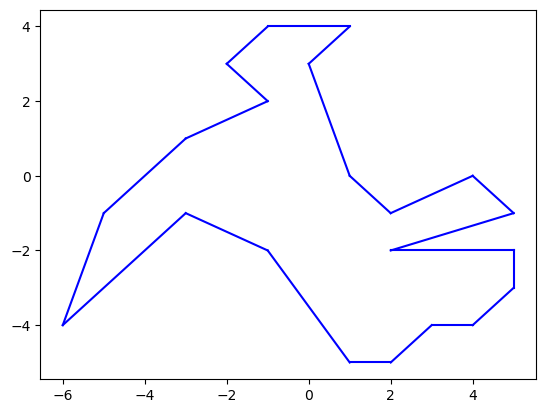

In [21]:
def apply_transformation(R, V_transpose):
    return (R@V_transpose.T).T

plot_path(apply_transformation(rotation_matrix(math.pi),dino_matrix))
plt.show()

When running the cell below, you should see the STL boxes rotated with an angle of $60$ degrees. Again, you can play and modify the angle of rotation.

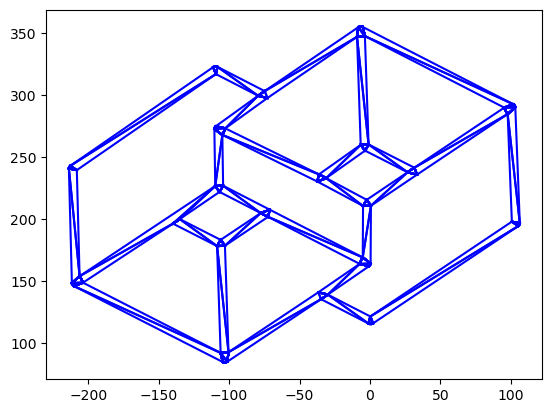

In [22]:
def rotate_stl_fig(list_triangle, theta):
    for triangle in list_triangle:
        plot_path(apply_transformation(rotation_matrix(theta),triangle))
    
    plt.show()

rotate_stl_fig(box_2d, math.pi/3)

# Skewing figure

Another class of linear transformations is skewing (or squeezing). It corresponds to sliding a stack of cards.

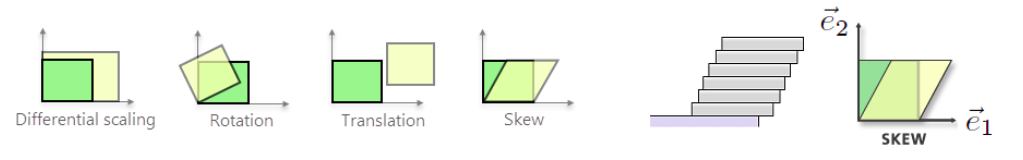

An example is 
$$ \begin{bmatrix}{x \\ y} \end{bmatrix} \mapsto
\begin{bmatrix}{x + \alpha y \\ y} \end{bmatrix} $$

This transformation corresponds to the matrix 
$$S_\alpha = \begin{bmatrix}1 &  \alpha \\ 0 & 1 \end{bmatrix}$$.

Try computing $S_\alpha[x,y]^T$ by hand, to verify it.

### Exercise 7 (0.5 pt): Skewing the dinosaur 

Let us play with this, write a program that performs this transformation on the dinosaur for $\alpha = 0.5$, using a matrix.

Hint: You will also be able to reuse your function in the later exercises.

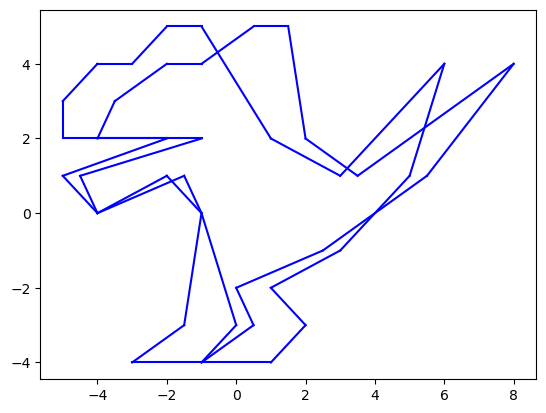

In [25]:
# Hint: Return the array.
def s_alpha(alpha):
    return np.array([[1, alpha],
              [0, 1]])
    
plot_path(dino_matrix)
plot_path(apply_transformation(s_alpha(0.5),dino_matrix))
plt.show()

You can of course also do a skew in the $y$ direction, using the matrix
$$T_\beta = \begin{bmatrix}1 &  0 \\ \beta & 1 \end{bmatrix}$$

### Exercise 8 (0.5 pt): Composition of skewing transformations

Now let us investigate what happens if we do first a skew of $0.5$ in the $x$-direction and then $0.5$ in the $y$-direction. What do you expect? 

Hint. We advise you again to write first a function `t_beta(beta)` returning the matrix $T_{\beta}$. 

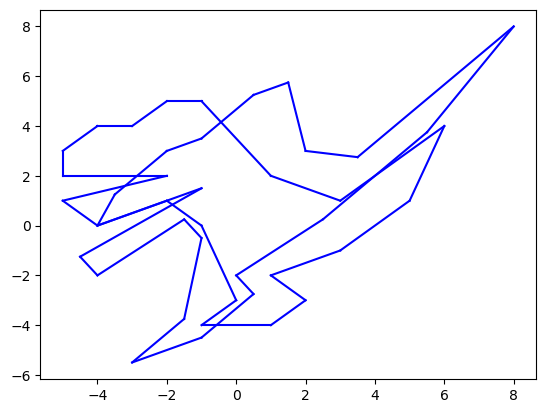

In [30]:
# Hint: Return the array.
def t_beta(beta):
    return np.array([[1, 0],
                     [beta, 1]])

# Hint: Only plot, do NOT return anything.
def composition(alpha, beta, matrix):
    plot_path(apply_transformation(t_beta(beta), apply_transformation(s_alpha(alpha), matrix)))

plot_path(dino_matrix)
composition(0.5, 0.5, np.array(dino_matrix))
plt.show()

Now do them the other way around, for $0.5$ in $y$, then $0.5$ in $x$. Is the result the same? (Just verify your result, no need to explain.)

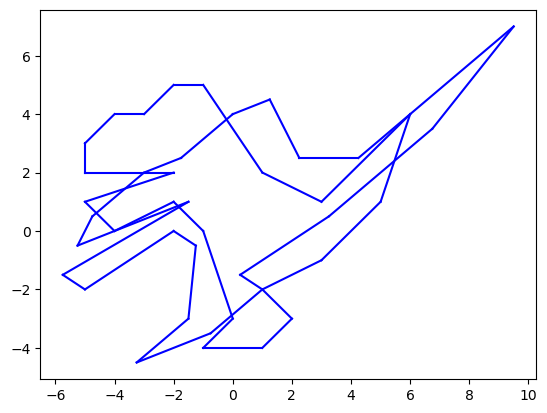

In [31]:
# Hint: Only plot, do NOT return anything.
def composition_reverse(alpha, beta, matrix):
    plot_path(apply_transformation(s_alpha(alpha), apply_transformation(t_beta(beta), matrix)))

plot_path(dino_matrix)
composition_reverse(0.5, 0.5, dino_matrix)
plt.show()

### Investigating the commutativity of skewing transformations

The application of the two transformations can also be represented by a single matrix, since $A (B D) = (A B) D$ for any transformations $A$ and $B$ on the data matrix $D$. Which matrix corresponds to the first case above, 
$T_{0.5} S_{0.5}$, and which matrix corresponds to $S_{0.5} T_{0.5}$?

Try out the assert below and see for yourself.

In [32]:
TS = t_beta(0.5)@s_alpha(0.5)
ST = s_alpha(0.5)@t_beta(0.5)

print(TS), print (ST)
np.allclose(TS, ST)

[[1.   0.5 ]
 [0.5  1.25]]
[[1.25 0.5 ]
 [0.5  1.  ]]


False